In [1]:
from IPython.display import Image

## Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear Support Vector Machine (SVM) can be described as follows:

Given a set of training data points $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ where $x_i$ represents the feature vectors and $y_i$ represents the class labels (-1 or 1 for a binary classification problem), the goal of a linear SVM is to find a hyperplane that maximizes the margin between the two classes. The hyperplane can be represented by the equation:

$w \cdot x + b = 0$

Here:
- w is the weight vector (coefficients) that determines the orientation of the hyperplane.
- x is the feature vector of a data point.
- b is the bias term (also called the intercept), which determines the offset of the hyperplane from the origin.

The decision function for classifying a new data point \(x\) is based on the sign of $w \cdot x + b$:

- If $w \cdot x + b > 0$ the data point is classified as the positive class.
- If $w \cdot x + b < 0$ the data point is classified as the negative class.

The margin is the distance between the hyperplane and the nearest data point from either class. The goal of SVM is to maximize this margin while minimizing the classification error, subject to certain constraints.

The optimization problem for a linear SVM typically involves finding w and b that maximize the margin while satisfying the following constraints for each training example $x_i, y_i$

$y_i(w \cdot x_i + b) \geq 1$

Additionally, you often encounter a regularization term to prevent overfitting:

$\text{minimize } \frac{1}{2} \|w\|^2$

The optimization problem can be solved using various optimization techniques such as quadratic programming or gradient descent.


## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is to find the parameters (weight vector w and bias term b that define the hyperplane, while simultaneously maximizing the margin between the two classes and minimizing classification errors. The objective function can be expressed as a combination of two components:

1. **Margin Maximization Objective**: The primary goal of an SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points (support vectors) from both classes. Mathematically, this is achieved by maximizing the reciprocal of the norm of the weight vector w The margin maximization objective is formulated as:

   $\text{Maximize } \frac{2}{\|w\|}$

   This is equivalent to minimizing $\frac{1}{2}\|w\|^2$ since the reciprocal of a positive quantity is inversely proportional.

2. **Classification Error Penalty**: In addition to maximizing the margin, SVM also aims to minimize the classification errors. Classification errors occur when data points are on the wrong side of the hyperplane or within the margin region. To handle classification errors, SVM introduces a loss term that penalizes misclassified points. The loss term is often represented as:

   $\sum_{i=1}^n \max(0, 1 - y_i(w \cdot x_i + b))$

   Here, n is the number of training examples, $x_i$ is the feature vector of the i-th data point, $y_i$ is the corresponding class label (usually -1 or 1 for binary classification), and $w \cdot x_i + b$ is the decision value for the i-th data point. This term encourages data points to be on the correct side of the hyperplane with a margin of at least 1.

Putting it all together, the objective function of a linear SVM is to find w and b that simultaneously maximize the margin (by minimizing $\frac{1}{2}\|w\|^2$ and minimize the classification error penalty. This is often formulated as a constrained optimization problem:

$\text{Minimize } \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n \max(0, 1 - y_i(w \cdot x_i + b))$

Here, C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors. A smaller C encourages a larger margin but allows more misclassifications, while a larger C allows fewer misclassifications but may result in a smaller margin. The choice of C depends on the problem and the balance between margin size and classification accuracy desired.

## Q3. What is the kernel trick in SVM?

The kernel trick is a powerful technique used in Support Vector Machines (SVMs) to extend their capabilities from linearly separable data to handle non-linearly separable data. SVMs are originally designed for linear classification tasks, where they seek to find a hyperplane that best separates data points into two classes. However, many real-world problems involve complex, non-linear relationships between features and class labels. The kernel trick allows SVMs to handle such scenarios.

Here's how the kernel trick works:

1. **Linear Separability**: In a linear SVM, the goal is to find a hyperplane that separates the data into two classes with a maximum margin. The decision function is based on the dot product of feature vectors:

   $f(x) = w \cdot x + b$

   where $f(x)$ is the decision function, $w$ is the weight vector, $x$ is the feature vector, and $b$ is the bias term.

2. **Kernel Function**: The kernel trick introduces a kernel function, denoted as $K(x, x')$, which is a function that computes the dot product between two feature vectors in a higher-dimensional space without explicitly transforming the data into that space. In other words, it allows SVMs to implicitly operate in a higher-dimensional feature space.

3. **Non-Linear Mapping**: The kernel function maps the original feature space into a higher-dimensional space where the data may become linearly separable. Common kernel functions include the polynomial kernel, radial basis function (RBF) kernel (also known as Gaussian kernel), and sigmoid kernel, among others.

   For example, the polynomial kernel of degree $d$ is defined as:

   $K(x, x') = (x \cdot x' + c)^d$

   The RBF kernel is defined as:

   $K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)$

   Here, $c$, $d$, and $\sigma$ are parameters that can be tuned.

4. **Kernel Trick in the Dual Form**: The key advantage of the kernel trick is that it allows the SVM optimization problem to be expressed in terms of the kernel function. The dual form of the SVM optimization problem involves only dot products of data points in the feature space. This means that instead of explicitly calculating the transformed feature vectors in the higher-dimensional space, you can work with the kernel function directly in the dual form of the problem.

   The dual form optimization problem is formulated as:

   $\text{Maximize } \sum_{i=1}^n \alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)$

   Subject to: $\sum_{i=1}^n \alpha_i y_i = 0$ and $0 \leq \alpha_i \leq C$ for all $i$, where $\alpha_i$ are the Lagrange multipliers.

By using the kernel trick, SVMs can effectively learn complex decision boundaries that are not linear in the original feature space, making them suitable for a wide range of classification problems, including those with non-linear data relationships. The choice of the kernel function and its parameters can significantly impact the SVM's performance, and selecting the right kernel for a specific problem is an important part of using this technique effectively.

## Q4. What is the role of support vectors in SVM Explain with example

Support vectors play a crucial role in Support Vector Machines (SVMs) and are central to the algorithm's ability to find an optimal separating hyperplane. Here, I'll explain the role of support vectors in SVMs with an example.

**Role of Support Vectors:**

In SVM, the primary objective is to find a hyperplane that maximizes the margin between two classes while correctly classifying the training data. Support vectors are the data points that are closest to the separating hyperplane and influence its position and orientation. These support vectors are the most informative and critical data points for defining the hyperplane and are used to calculate the margin.

**Example:**

Let's consider a simple binary classification problem where we want to separate two classes, 'X' and 'O', in a two-dimensional feature space.

Imagine we have the following training data points:

- Class 'X':
  - $(1, 2)$
  - $(2, 3)$
  - $(2, 5)$

- Class 'O':
  - $(3, 1)$
  - $(4, 4)$
  - $(5, 3)$

In this case, the SVM aims to find a hyperplane that best separates the 'X' and 'O' classes. Let's assume the SVM finds the following hyperplane:

$2x - 3y = 1$

In this equation, $2x - 3y - 1 = 0$ represents the separating hyperplane. The coefficients $2$ and $-3$ represent the weight vector $w$, and $1$ is the bias term $b$.

Now, let's see how support vectors come into play:

1. **Identifying Support Vectors:** Support vectors are the data points that are closest to the hyperplane. In this case, the support vectors are the points that lie on or within the margin. They are crucial because they determine the position and orientation of the hyperplane.

   In our example, the support vectors are the following points:
   - $(1, 2)$ from class 'X'
   - $(3, 1)$ from class 'O'
   - $(4, 4)$ from class 'O'

   These support vectors directly influence the hyperplane's position and orientation.

2. **Margin Calculation:** The margin of the hyperplane is determined by the distance between the hyperplane and the closest support vectors. In this case, the margin is the perpendicular distance from the hyperplane to the closest support vectors.

   - The closest support vectors are $(1, 2)$ and $(3, 1)$.
   - The distance from the hyperplane to $(1, 2)$ is $1$ unit.
   - The distance from the hyperplane to $(3, 1)$ is $2$ units.

   Therefore, the margin is $1$ unit (the shortest distance to a support vector).

3. **Classification:** During the classification of new data points, the decision boundary is determined based on the support vectors. Any new data point's classification depends on which side of the hyperplane it falls on.




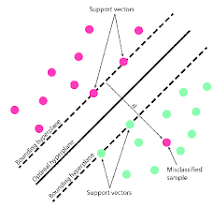

In [2]:
image_url="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANUAAADPCAMAAABV02RMAAAA81BMVEX///+L/68AAAD/PLv8/Pz4+Pj09PTFxcXp6enJycnf39/U1NTa2trCwsK/v7/l5eW1tbWD/6qsrKycnJyjo6P/ALF9fn6Pj4//Lbj/+fz7//wnJydHR0fe/+d9/6by//bG/9af/7xtbm6Fhob/kdRTU1M5OTkVFRX/y+kfHx//2e//XMP/T8AxMzP/8/q6/87m/+2V/7XU/+Cx/8j/vOP/rN7/dMr/mdZiZGSp/8L/g8//6vb/asf/tOD/o9vTq8LvE6nYd7Lud8CEYnfBNpAfKiSwoKnrlMk8JzTHE47kxddkW2CROXBt/5yr1rcACwCF0p1MF1mXAAAWpklEQVR4nO1dCXubOpcmRAhtgCIIOLETO3ZtZ6mbpWniJG3nm+2bfe78/18zEmDHBoHwlrrP07fP7U3AuHrR0dHZJFnWH/zBH/zBH2wfgGH4q9uwfZAEQwgcCKgFHGRZCFkQYgwAshzoQAsi5CKLWfIHdfs3AUkYwpDhyPeA8LxARDiiiXCsEIgAU4oxGwSux53Q5wT86tY2BZA8fER94QzIgCSUUS9kvuyViPVFPxn40PGCBArcRyL6bWQVMhFyLPwExnAYJNT3/CiQEmihacpPEgxR3+mzqeWJ4Fe3tikgIyhgyBckgFOEHELkAIJMyhq1IIFOQBwKScAAAyT4bSTQAul/jAILiqWL6n9A/Qjy338fTjOAjNwC4NqDaEg2bs7O0GdrPji04602ZKuIB+s9B8ZrPvgRgIkwf6gMZ9vt2C4ilKzxFIz32/6YWuHq7x317XAHbdkaYGxhvupDZDrea1KW71sriyCKr/ablBU7Fuyv+EwQryG0HwkQp0K4ChzHCvablMUi2Uy+ijGLEr5HFtWJ9mokjR5A3eZfA+Ortea3neDb9++vjxpiAyVLQdT4e8i0vT9j6umw1WodfitdBxkrjelz/Xzzelm6ikbj/SH1eHwo0bq5Lt5grhojiJdaenkj38Ph5+JlJ9kj2+/mMMXxY/FGZvdAXnRGrr+30geWe9fJHZk9wXHGqvXpS+FGFqAADBeu/2hlTyx31p55HtmbL/cVEBkrWrCZTj7l7+F48erUNhghZEA3buoKuKwYV5GXCRQpKsFveV+13i8hIylq282V6TYgJUqO/ZJOG+TTLylOQZefs3H1Y34FTUykmN1e2UzeED8+PX0qkYJJ7iQhv6gufqRTwff3C6hvEr/hh5PSg9Jco0GvGLs4uXx9enrXgAG0DDEb3BnvBymLz7lQjRV08m6KsKkwzL3YtveEVGoEZsC1w1x6voYYNZnsDSnkzWMPur6aAZC4HdaT8oe2v7VmbQiM52JFeHVwJZhemUhN9oeUJd4tCodWh2EhF/WkaGePSDliwRLAle2CFqjXFH5nvD+kLOIudAH19B8KRn2DSnf3SfzkO170gF29CgNjk0WBr/app+SwWmxNoE8hdEzBTLZH2k8BcbL0m46W3cCg3Zd5KkNB5rDOicAGh4raV/tFqqj1eEmQzNk6ZjJoHfjBrjPwlsNltCiBbDgw2H7U5Ho40XTdjN+aKFoT2Ft+raRjJ/WsjKQs154UQwc7BitIHKJLAic937Beeth4bAp3sviDSVnFUIWzpARBcmWI++GJwZ8Cu0uF68PQEtAt6jy+eMEx2X7ulUmli/6OQjNv3z49X+qJIa/YFf57XyFmKrnAIxOpyB7thtWlikN//qGlRUs2A/VmFTGk3zckScwGbbgrRfF2o+JErVY5Wi6Fvpw1jWbNIJ3xxv4Utq9201MneUyv9UnTWSgqjWXWyVihkW1QFJ7ZSofDHU1UJ8+zSGUxDG0pVuVrQdZBiUmlm10P+cZ2Vbdw8jOLKreetH1VuvTl8jENWCPDLISN2i+8WiHLtyqu8+D6c5kVcEtO4qMKa37+B+MQN1vp0djeYdXWybdjyev4RiOAsKQB8xD03/4yqHRyZQpmRra927KZy5vWzTedYi+z+paL6z/Wf6N0PQwCKuzxryoEDYqsvnzKFeZz7XNmg9aCH5vtWQAQRcH/8tyElSRV31MO+YVlyE45uZsnF491U/YMRvEDwmjG7xBOORrx9k8thaeap5qQGvm/Lm9c9EIkyD//y/enp58afTkDNmk/IOzOR/tTixiUpJ/1//Xv129vNc+4Jn/KIlsl9eW65g1rMS38DvDQbNAak24o2Z5JcfL49P3peSVepdlKyo6BlGckJW87WxtTJ6mlUzvKSxAlexoZFjFJUgaDNmqvU71bhevM0mmVql5qMFz+lRiLeMxjasu232Vu6dw0f6Sg1+HVuCIfMgNum0iFY3urZlLO6vCw+SNkSZiQMUFAbeOYam+XVF5Ndth6bf5IvDiG0JW5OMRsMIRbttJnxWF1lk4BSxmBgZmUKUHAduB4XDYwtZexTMPQD0aDVroeyQ5M2rfn759K1Yw1WMgaUOOqVNaA1EfH0rXoz+dK1rEN1gAxkZLz946CmasBDGdhMWo0k8zixyajfegpi4q8rySpyJAgGBvTo1DsMJykwfXj5aXOBp8pYcBHhp5y2yaVzj+6nx5vDg8/P2n0fe6FgAa2n0mlC7to/O8Y1y01jR0/lXoLZkXeLAksVMvKTCqS2q/eSu/2bm97XWNjG+M5N6R+FG94aUNYp+1ZuFTvvfi5kZmUKUHQfTk4Ojp42R6t11nIqBgNTJRpTTrKn4JuKYc1hyt7qr4fgG0bEgTdl6MDiaOvpw0bbcRrRTRaDGRfsUmW9QChqGg5NpKSxE3z1N1BhqO7ho02Ig9aHhbdLtEham5NsiY7kb7t1Bh2Fg1sv7PzjNX51lhZx2lG7rXo+fM0soXmXFydi0uNVno0nphtv7ujnNX2BtaXm+PjY10+LmgvDaak3Clm10PYBc/3TqqFs+Knui9pZx3db21c6XCi5rB/+/eC69EvMmDGBIHUfsuk0uaf94qfu7uXvXV0sEXVXsaXT0oqW//x98J1vtxbZiudTSfLiqKXa4VSb5327u9767S1OS5zZV+yN7xFTWgmJXVoIfDyNRtAR1+30czVcDLLUH0vDbaBPx9q5lj6QmF1jtOXXC3cbqelq2Ce0tekifmsAhcbxxS3pyWlfpuz6m2hmasij9scfyrfArnx5F6ZzCRud8qux5nSClLXbW9eao7//FtWVKKLBkCuaLmmuB+IbK2T2JOK/fz+YRutvPz583KF8Dr9r//+3jo+vtEHeaHvQndiVBSDttajOn3o3fZKGnAdPN+0Wp9fG4dhSOev6Prx8fG6wrxzaDgyLzWClW7idialH8qBajUPbgZTUyrnyjYYtOHOS7xPbjKNVl7UpwWyQL2PKF2PSVLtmChE43bz9q2H68+ztbJNPo1GpteM21fcwXVJ3ehqlxUvGd4+565Gk6AtGpnWhtJxqtLDam0R7rSMZ4ZMAluf61K5OQIjqblBK6pogb7J890K3g5TbVGKS5QhPd+mpOTwqqIFP2ZPgbfX41YjXeEMTQtYFg1arH50XI4WtQuvigSshZO3t7fqiba2kGAG8zsuxNL7Ur/7MfYXij35VhMEX56lP1vevWEV0I7pNZdcD8yRT3AyJwW43kxaEydPqeF2uAEtOrQNC301rgfmgVgg5a9YHHJ69/BwVu3UP+ZT0mtlqb0BwJz1wOOy6+FwEbx7G044XSmVc9o7OD8/v62k9ZyzWlsGiZlUW+dPAfy+4jGwnLJKP707q/I6TjN3/7zSg/y5KatgYFiR7U70TqL0t/LOErpN2rq9i/uLnp7X3UXu7leZu9eH1TXODRAAtR9UHbxJVWWm42dupNR+ZVbd24Ojg6PzC2277y6qQjM5Tl7ToNDhCun5BdCpaSsyRapKQULsQRX3a2vG1EMevOzpHpz3VaVj/Pbz+3FLs31QE7COyaLANaSUEHogGmvNpF4eab7XPXeaB5wOqrXgydv1ylVyGQLjsghTggCIiI+1tl8vb/eB9rkH6e1Lf38r7n4Bykqvn33x1ZVhfpYqQ1/Gk7M6etHePT17ubj4uhV3v4TQWJtkDDvHCOs/cpeFlP6nSsZOJcwtXBnmSqkmCYIpsuhIe+/u4vzovGbg7ARs0jeYtOYEAc/So16Fxrm73Y2IaZAXiErtZ1o9WkcqFR85T2UqvUIIPw6on06p0qA1KIraBEH368vXh64/nM1T2LBoeNeIkdLlauOala30d3SVXl4yG/Cv3FkPMdEnymPgBtsP11ZmXhwVczaAlnag+jAwP/RERAJjElpvpc8wS+VeLNg7lfPWtvH2+PhjqUgJCG4lgbT9TKOgykrPkZt4B/eLKs64Ino7eHtttY4PZ9U8ajN8zhNhUTYcG8TPMyQIurnBfbFkmwLq7Z5Wvrh0logKOGJxIoTa7MREalRn0CpcaMtZHNqkvmIzXOcx9uPM8IXch1GELdAxkXKNpILuhXTPy64TcHcuhPnCysPjTAQR9eUfSxkC9YNK5afqSUVDv/vQ62nKxKTK2LGCn7NK+4pQPxJSUSDLsBcebpt6StijwEJ62xQ0szK6vYc1M1lvWelVK92yUGk/TCzSuTI8Rccjz0BqPCWlRSRzAGoucUxDMfcP69m915+PJalUAAlH0ruDpMGyCHPFi3ISY7syTla/G5+lSB1tUmN2/dTKyzSDJICCBEZSxLwsgqa2H46rl8Jgwz/SPc/dyc2cFNQXSDBIO7ahycRu1+fl5hu01W7VTie1XzIvndsoSQw9kik1alj5Ka10Q1CZX2VdBOpXjdDapVozVpWxwCZACR5i4TBqSsOYd7jidp5j9Q0fpKJm36i7WUBjA1bOwEl8DtiwY8gCGpeZA27PdoOKTbMS7leX5Z+mpT9HBxvUyCAvhAGVBq0xlm5cC0fsuZO4IID6eQsO1OE8JyfaeHL39v7g/mJNza4g3R4sBmpJrMmfapsqXiwUz1QJng+/07Ne71Yzozo4ol8uv1XV5dytPQsrAEIHwE3gwGz7dQxDZVE5zpfRnT7cnx+dn2t19JefLekzNKuJWAEsoJHrhr5FIa2yOnHmPLijiWF5Cl+YFeDcPcvKyPSx9MvDlZfnNUEQcRxiFJLqOYiSgUqImK10YV+9K/337UdnUWddLH1ePrl6y2sRhJRhaWGPKrweh8A48KGFRxODqS3seMFCmierTmeFjOeaZ3JW5eMDNkJApKGE0qxHRZO5iKmHAZ4MDctT+HixMjN4H6N1GYKfqy97NYMlaj0OUGZS1XqIBHkcAto2mElqIC2W8Sxs1JmnobSpjV2MKyRNPzVDTSvzUxh5noVUIrt+TAHoLJ/NtejGPxycHx2da6uewePhsVSCDcpyGgNhFnK14QzUGkoBdTCdqsMlmXEZJS9sgQWXYi7d3kuvWzGfvv18fX4PcZ3e3W0YdYdxkhCCI1bVC9KJ9NEEWYFt2sCKF2n7hkG4jP7MYJGTgJzZNnA++lbELSFQOKn27TjG05SUudq58B3JSnUVSb70fjYCV3l2+YuAF4RRuh9whfYDvMMTOTHTOtdDqe2L//2rX5gW2GrRMZbvL51niY/WLtEPhjAmGNBh5YJXKrsSB5DWrWM7PUot6/8r0jauEisApr5Wd7acYl1WTuSGJLZgOKmw/QBxQ2l8Su1X587n6x8uiv4CX3WNdtpZ3dvNFokgGipdAKX2qyAVRAT1Iwe3h3VWej69Fl9u4K4aniVpGOMhY7Vm0p5E2Pe4RattdIypIIHPR219hSxg6eu4z1n1lu+6q1fLxUpnShFUKS99Qt8EJ6E+daWiGFWOmEQQ+YnqiheWhOrZnNVBb/muvzornCr3u9uLi5eva3lVhHPfwio9WuH5wshPItkX3mjoa/UjgDTB6lCKs0xbFIILgb96fsAZpK+ve3d3t8505cAgdKXc46FdtcxciucgYI47GlYMeuW++Fg1XTqE50dfC8pi9ZMoVUHkZqsRfD9IiGP5VXE/AKZpLBmP2hUxChQHnCP5FfKt3J2dnRUlBhtiG/ov3WQPJjzwo1gdlQZL69RyQJ/G3LXwpFOxKoIy13ekMSByi7fY40HNeSLVcFaeDd6B3IC7QV2EEcPICsYWbheNoPy2FL/YU6dQiHF2fDMqhmjpegdXkXUPDk0iJIBUUNJM0mop6ciTIOpzC3lVk68fQSSVvvNe74cKogyqjxOpBdSelmBGH3Afx74ipXcSAx4K2QF9i9iV0XY8JLHUBm6ayrHUMC+cah2sm0qsO9+nBnAq2CA9NKbK8w1iCoZwiOx2xdCgtsBZ7um9cCFY7hu2riShaL3OgmHA1YDQl/HQGMoXjerOn4LCCj0iLYtFiyNY0l5gLQ2Yoqp+y4QgJpJQ1SmxTFpQLKhJEDA8CKC859uL2gYtiRwylHPVtW7tyhkaVi19cpTtp3pqrC8mVQ0OrDhRpJbW+TpLE2jQYN457Xa1Dr/5fA49WPUW71Akvpqnqsp4AKFy7rVC5fkuf8fiMAfUPO10exfn97fvc7eKoaLZtPe+s4TjQJJJFUD1oSCvU2H7ORSRgQgsdzKqEL+AD6hkDcFoWohiLJ7QCM0CmJY+LxajSbM06FtMnSAKnBCpg0TlTwARP0Tp8QLz8wUrULnhL44iKp1EbzTSB14AYjySci//keKGANIaeb8SmA8CfSg6ZXHfSkYWQwwGFIUESYEh0EMQezRADFuclTdqbQQaYRwBpzqWjnwshGQVaTccmas9wOcvRY4d/b81i1BfzFmFMOlbPhMMK1Z46sQ+6jPkU+GFPKYxWYcVBiQmiU8ct1MRSweSNfWldAtbl8J+38kXzLqq2/v69aWndSpKrCLUJzHwYBS5TP01DLyQCU4wcnHieVKHmU4D04FwN8QBVvkpvT8lNYnHBVaktGcQsPm7gDMNeKsKOQ+0AYhZ3H0ugcyK5Zul0GeMB66PI0hd4lMpkYwFmFq+qf5IB+qzGEunDY8mFfl76c97NApANJ5oNRzEM66zczVnxYG6CET3Ikv5zgXUkRrQUSpPjl75F4IWdIDUEw6Q2hHKe4ZV13pWMUB9VLksQs7MlPb7gBI0rHIj6cxYns3OX4v9sYi7l6Pz81JcaquA4QANYmTRq4mr7ampKwYcqcOfAKlSsPMihNmom7HSx8C63Ye7ne5rY1EibT9Ws2Wr05bOLw18tybWTnIXdL5dXm1fSdTFJtimBwuTkCW+2jCv9rSIqar24Pa0epm5k29o2JldeDjIaDXqEekvYmExgSmVvhuTrJJNFqoSEYQ47teRguqQsUjZfsVY+hJ4OmOh9yn4LF1k1GvUDDUbUYGx8GkSwRjzARTrl1Irs1TayTGrJkV8MVXC5dsVNkeOzPpbdJC6t73bhgrBkSPbj5mFfb9PrRD7nUGyPitABQAYWV4VKQApc8JY+ZuajWsWkR1tuOax6TgJBm7CAHa9QRxyxr2NNvUAfsRZzYbVLPHCgeirycTkpqpq3WDzkwlXTaZo4cjp063YXtJBjs8SDEDoNdgQQLEKN9/gYZ35Vgdl0OquQ+xSwZHvINcemgN81HWyDMBeQBWH6ONNwheuevt+KT2qg8MR2uoeDxvBn1a5Hlz4nDoV63zLEAH/gG1TGmLmRBcBfEa5ylH161X6HJztYrvu7QJLz1ikGz+QhloJJWu4Cx8LGLmCusgSK6x9mO7F1tY1AN7AUoXF3O40n+Oroox7g4iRRE693DbVmf1GCCBImAfUJvBaoQI4LF8HS8GrD9qbaBXAduonOeFYr/3gUOoGFCAkPyUnajmzUYRxTNVeI9DlEEVuKKdvbqEIrpWg2wFw3MFRGowFVdIXxJ7rCjcKhDO2BA6hHwlH+g4JiCSpqbRMGRwElE8bbTu8ewDHwjAtRPfrFnmQgYeFy5BLhtIN5pAKX3lEMJxKw9GLgEWRCFDUkd7ZHihGxPtuFKmlwnVbDAF/gEnS9/wksUaiD8LQcz1LHe3UZ1YYQjqgqicTa2p5WzB4NwYWnuAqASpJ1WWhMl2gltSlGbpMUsH7PZD+Wbj4SwFEHISBSsuNGqTWkKOS378DKJcehSU6O99g8mPBoNoE4vfoglUQ/cqNDXYFYTfYBP63Ax9+7AksHwOH7IM2/oM/+IMPxf8D5WyGDmYiMNYAAAAASUVORK5CYII="
Image(url=image_url)

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?


1. **Hyperplane:**
   
   The hyperplane in SVM is the decision boundary that separates data points into different classes. In a 2D feature space, the hyperplane is a straight line.

   Example: In a binary classification problem, consider two classes represented by 'X' and 'O' symbols.

   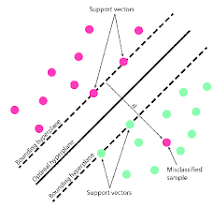
   

   In this example, the solid line is the hyperplane that separates the 'X' and 'O' classes.

2. **Margin:**

   The margin is the region between the hyperplane and the closest data points from each class. It's the space that the SVM aims to maximize.

   Example: Continuing with the 'X' and 'O' classes, the margin is the area between the hyperplane and the nearest data points.

   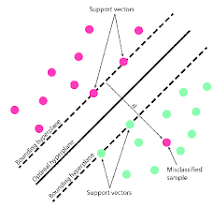

   The dashed lines represent the margin in this example.

3. **Soft Margin:**

   In a soft-margin SVM, some data points may be allowed to fall within the margin or even on the wrong side of the hyperplane. A regularization parameter (usually denoted as 'C') controls the trade-off between maximizing the margin and allowing some misclassifications.

   Example: In a soft-margin SVM, the hyperplane allows for a few misclassified points, indicated by 'X' symbols inside the margin.

   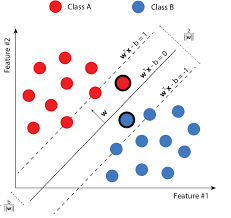

   Here, 'X' symbols inside the margin represent misclassified points, but the SVM still tries to find a hyperplane that maximizes the margin while minimizing misclassifications.

4. **Hard Margin:**

   In a hard-margin SVM, no data points are allowed within the margin or on the wrong side of the hyperplane. It aims for perfect separation of classes, which is not always possible in real-world scenarios.

   Example: In a hard-margin SVM, the hyperplane strictly separates the classes without any misclassifications.

   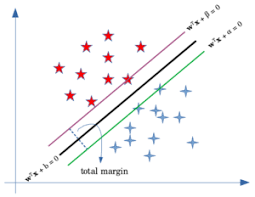

   In this case, no data points are allowed within the margin, and the hyperplane aims for perfect separation.



## Q6. SVM Implementation through Iris dataset.
## - Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
## - Train a linear SVM classifier on the training set and predict the labels for the testing set
## - Compute the accuracy of the model on the testing setl
## - Plot the decision boundaries of the trained model using two of the featuresl
## - Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import load_iris

iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split

x=df.iloc[:, :2]
y=df.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)
xtrain.shape,xtest.shape

((120, 2), (30, 2))

C =  1  accuracy score =  0.9


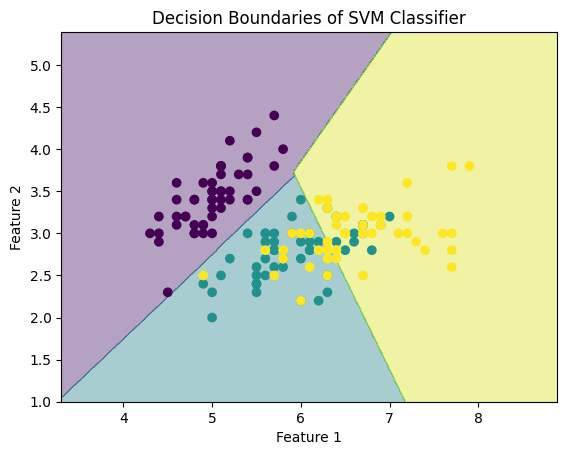

C =  2  accuracy score =  0.9


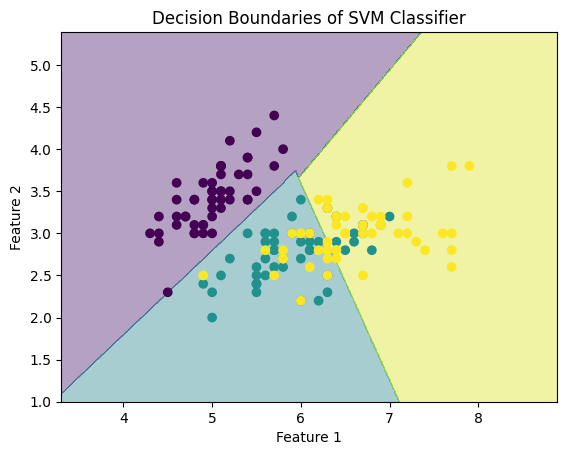

C =  3  accuracy score =  0.9


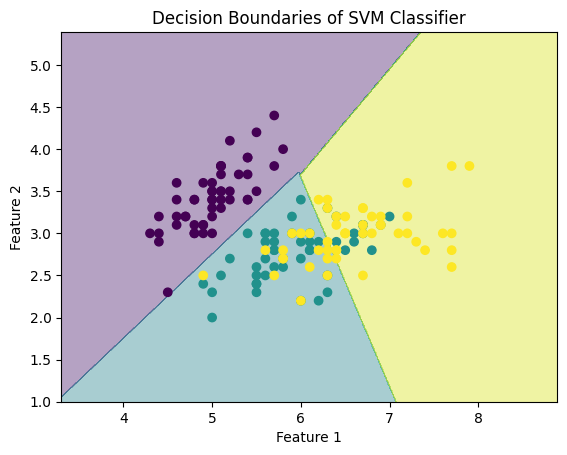

C =  4  accuracy score =  0.9


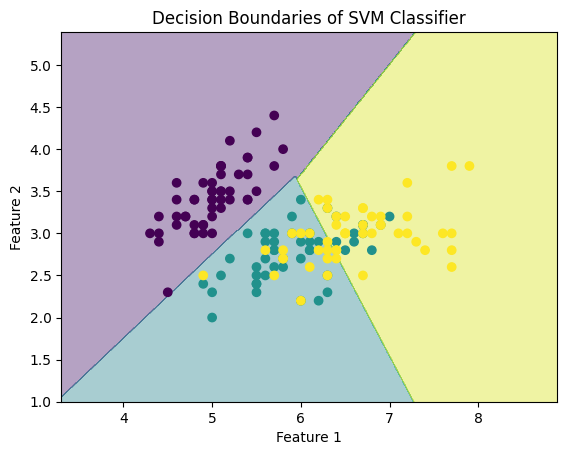

C =  5  accuracy score =  0.9


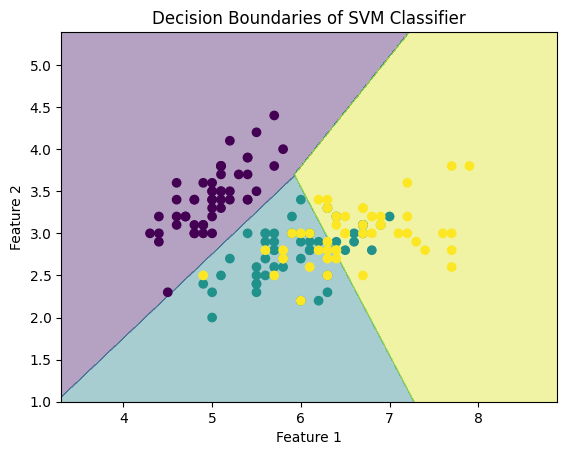

C =  6  accuracy score =  0.9


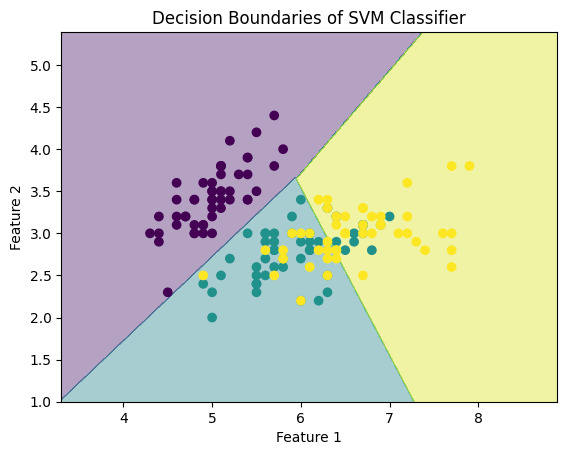

C =  7  accuracy score =  0.9


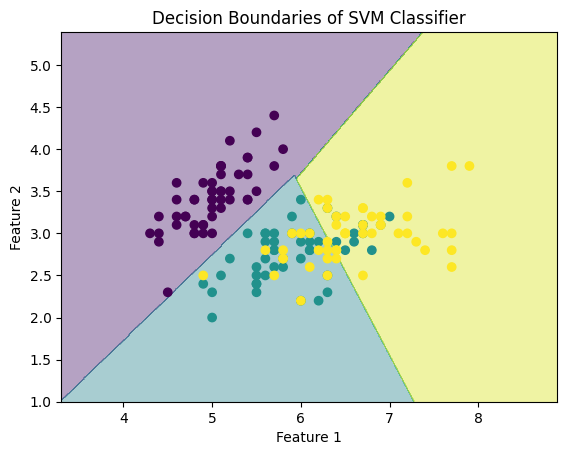

C =  8  accuracy score =  0.9


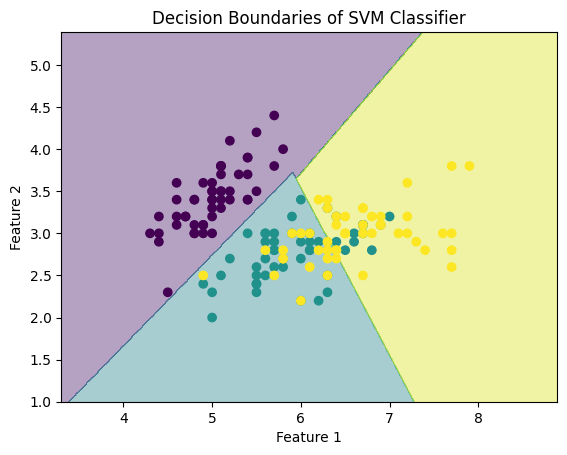

C =  9  accuracy score =  0.9


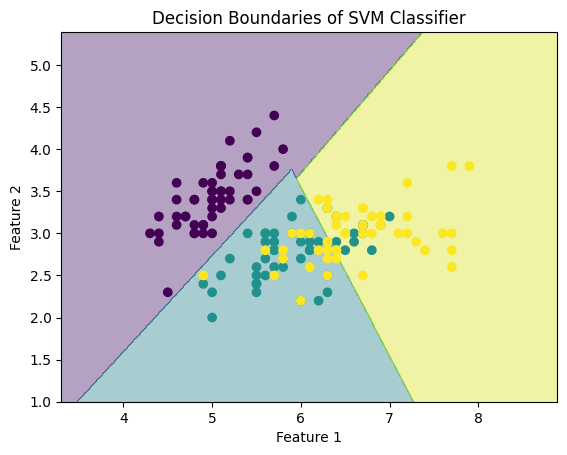

C =  10  accuracy score =  0.9


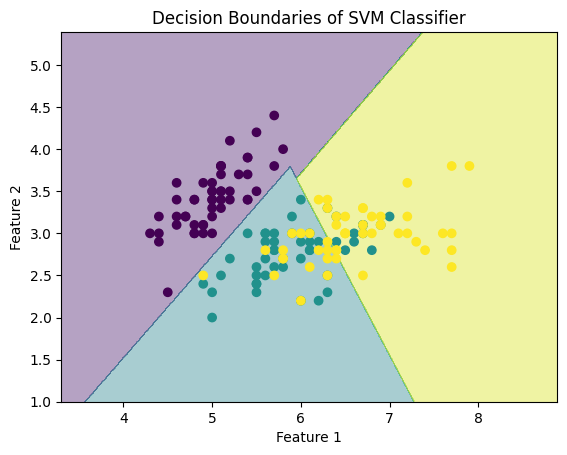

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for c in range(1,11):
    model=SVC(kernel='linear', C=c)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print("C = ",c," accuracy score = ",accuracy_score(ytest,ypred))
    
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries of SVM Classifier')
    plt.show()
